# 1. COLLECTED DATA
Avaibility data quantity and quality control 



### Init libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support, accuracy_score

# avoid displaying warnings 
import warnings
warnings.filterwarnings("ignore")

### 1. Collect data

In [2]:
data = pd.read_csv("medical.csv", sep=';')


In [3]:
# Show first lines (head)
print(data.head(10))

           Disease Fever Cough Fatigue Difficulty Breathing  Age  Gender  \
0        Influenza   Yes    No     Yes                  Yes   19  Female   
1      Common Cold    No   Yes     Yes                   No   25  Female   
2           Eczema    No   Yes     Yes                   No   25  Female   
3           Asthma   Yes   Yes      No                  Yes   25    Male   
4           Asthma   Yes   Yes      No                  Yes   25    Male   
5           Eczema   Yes    No      No                   No   25  Female   
6        Influenza   Yes   Yes     Yes                  Yes   25  Female   
7        Influenza   Yes   Yes     Yes                  Yes   25  Female   
8  Hyperthyroidism    No   Yes      No                   No   28  Female   
9  Hyperthyroidism    No   Yes      No                   No   28  Female   

  Blood Pressure Cholesterol Level Outcome Variable  
0            Low            Normal         Positive  
1         Normal            Normal         Negative  
2

In [4]:
# Informations about data type and length
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               349 non-null    object
 1   Fever                 349 non-null    object
 2   Cough                 349 non-null    object
 3   Fatigue               349 non-null    object
 4   Difficulty Breathing  349 non-null    object
 5   Age                   349 non-null    int64 
 6   Gender                349 non-null    object
 7   Blood Pressure        349 non-null    object
 8   Cholesterol Level     349 non-null    object
 9   Outcome Variable      349 non-null    object
dtypes: int64(1), object(9)
memory usage: 27.4+ KB


In [5]:
# Checking all the missing value in the data 
data.isnull().sum()

Disease                 0
Fever                   0
Cough                   0
Fatigue                 0
Difficulty Breathing    0
Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Outcome Variable        0
dtype: int64

### Cleaning and preparing the data
 

By Marina

#### 2. Cleaning


In [6]:
# Afficher le nombre de lignes avant et après la suppression des doublons
print(f"Nombre de lignes avant suppression des doublons : {len(data)}")

df_cleaned = data.drop_duplicates(subset=[
    "Fever", 
    "Cough", 
    "Fatigue", 
    "Difficulty Breathing", 
    "Blood Pressure", 
    "Cholesterol Level",
    "Disease"
])

print(f"Nombre de lignes après suppression des doublons : {len(df_cleaned)}")
print(f"Nombre de lignes supprimées : {len(data) - len(df_cleaned)}")
print(f"Pourcentage de données supprimées : {((len(data) - len(df_cleaned)) / len(data) * 100):.2f}%")

Nombre de lignes avant suppression des doublons : 349
Nombre de lignes après suppression des doublons : 282
Nombre de lignes supprimées : 67
Pourcentage de données supprimées : 19.20%


In [7]:
# Checking result
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 282 entries, 0 to 343
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               282 non-null    object
 1   Fever                 282 non-null    object
 2   Cough                 282 non-null    object
 3   Fatigue               282 non-null    object
 4   Difficulty Breathing  282 non-null    object
 5   Age                   282 non-null    int64 
 6   Gender                282 non-null    object
 7   Blood Pressure        282 non-null    object
 8   Cholesterol Level     282 non-null    object
 9   Outcome Variable      282 non-null    object
dtypes: int64(1), object(9)
memory usage: 24.2+ KB


In [8]:
# A) Drop the missing values
df = df_cleaned.dropna()

In [9]:
# Drop Age and Gender (not needed)
df.drop ('Age', axis=1, inplace=True)
df.drop ('Gender', axis=1, inplace=True)
df.drop ('Outcome Variable', axis=1, inplace=True)

In [10]:
# B) Verify distributing disease
print("\n=== Distribution des maladies ===")
disease_counts = df['Disease'].value_counts()
print(f"Nombre de maladies uniques: {len(disease_counts)}")
print(f"Nombre moyen d'échantillons par maladie: {len(df)/len(disease_counts):.2f}")
print("\nTop 10 maladies les plus fréquentes:")
print(disease_counts.head(10))


 


=== Distribution des maladies ===
Nombre de maladies uniques: 116
Nombre moyen d'échantillons par maladie: 2.43

Top 10 maladies les plus fréquentes:
Disease
Osteoporosis            12
Asthma                  11
Stroke                   9
Migraine                 9
Diabetes                 9
Hypertension             8
Eczema                   6
Common Cold              6
Rheumatoid Arthritis     6
Kidney Cancer            6
Name: count, dtype: int64


In [18]:
MIN_SAMPLES = 10  # Minimum d'échantillons par maladie
frequent_diseases = disease_counts[disease_counts >= MIN_SAMPLES].index
df_filtered = df[df['Disease'].isin(frequent_diseases)].copy()

print(f"\nNombre de maladies après filtrage: {len(frequent_diseases)}")
print(f"Nombre d'échantillons après filtrage: {len(df_filtered)}")


Nombre de maladies après filtrage: 2
Nombre d'échantillons après filtrage: 23


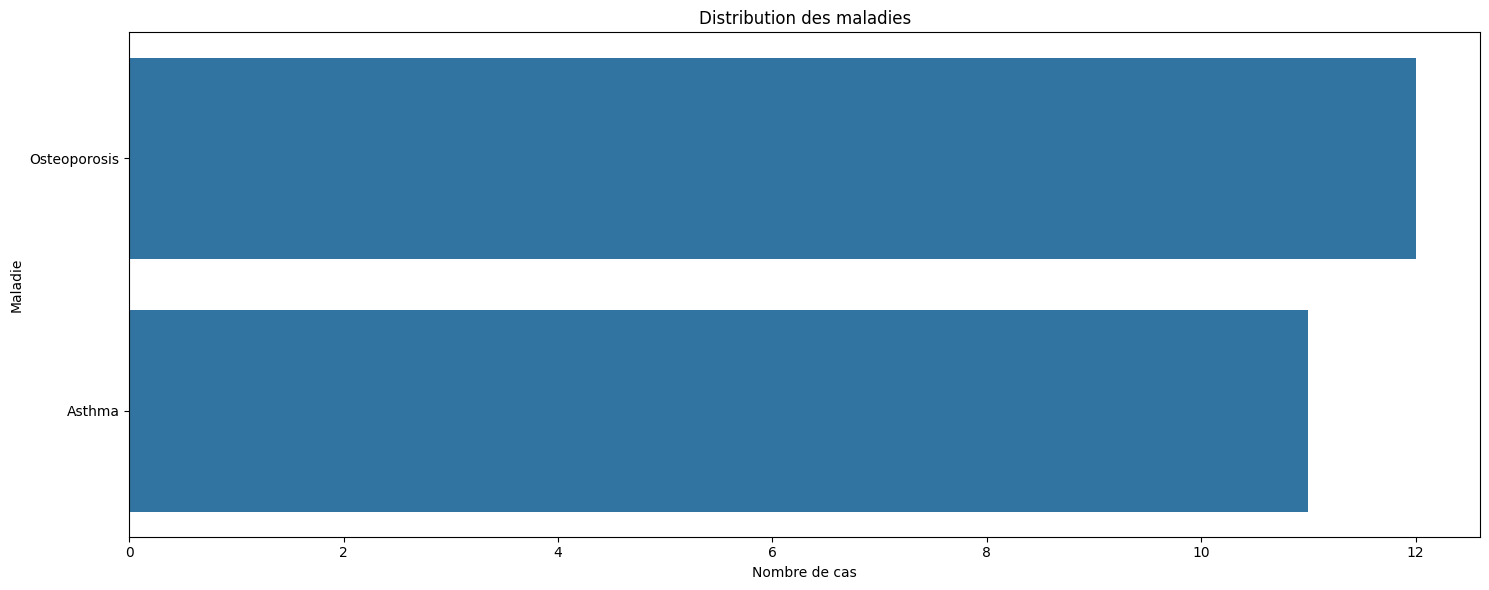

In [19]:
# Visualiser la distribution des maladies
plt.figure(figsize=(15, 6))
sns.countplot(data=df_filtered, y='Disease', order=df_filtered['Disease'].value_counts().index)
plt.title("Distribution des maladies")
plt.xlabel("Nombre de cas")
plt.ylabel("Maladie")
plt.tight_layout()
plt.show()

### Formating data

In [20]:
print("\n=== Encodage des données ===")
# Convertir Yes/No en 1/0
df_filtered.replace({"Yes": 1, "No": 0}, inplace=True)

# Convertir Blood Pressure et Cholesterol Level en valeurs numériques
df_filtered["Blood Pressure"] = df_filtered["Blood Pressure"].map({"Low": 1, "Normal": 2, "High": 3})
df_filtered["Cholesterol Level"] = df_filtered["Cholesterol Level"].map({"Low": 1, "Normal": 2, "High": 3})

# Encoder la variable cible (Disease)
encoder_disease = LabelEncoder()
df_filtered["Disease"] = encoder_disease.fit_transform(df_filtered["Disease"])

# Encoder Outcome Variable
# encoder_outcome = LabelEncoder()
# df_filtered["Outcome Variable"] = encoder_outcome.fit_transform(df_filtered["Outcome Variable"])

# Vérifier que toutes les colonnes sont numériques
print("\nTypes des données après encodage:")
print(df_filtered.dtypes)


=== Encodage des données ===

Types des données après encodage:
Disease                 int64
Fever                   int64
Cough                   int64
Fatigue                 int64
Difficulty Breathing    int64
Blood Pressure          int64
Cholesterol Level       int64
dtype: object


In [21]:
#Verifying transformation of data
df_filtered.head(10)

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Blood Pressure,Cholesterol Level
3,0,1,1,0,1,2,2
10,0,1,0,0,1,3,2
36,0,1,1,1,1,2,2
50,0,0,0,0,1,2,1
51,1,0,0,0,1,1,2
56,0,0,1,1,1,2,3
58,0,0,1,1,1,3,2
104,1,0,1,0,0,2,3
121,0,1,0,1,0,1,2
124,0,0,0,1,1,3,3


In [22]:
# 2. Préparation des features et target
X = df_filtered.drop('Disease', axis=1)
y = df_filtered['Disease']

In [23]:
# 3. Standardisation des features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, 
    test_size=0.05, 
    random_state=42,
    stratify=y
)

In [25]:
# 1. D'abord votre code existant jusqu'à l'évaluation des modèles
def evaluate_models(X_train, X_test, y_train, y_test):
    models = {
        'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=1000),
        'Random Forest': RandomForestClassifier(
            n_estimators=100, 
            class_weight='balanced',
            random_state=42,
            min_samples_leaf=1,  # Ajouté
            min_samples_split=2  # Ajouté
        ),
        'Decision Tree': DecisionTreeClassifier(class_weight='balanced', random_state=42),
        'SVM': SVC(class_weight='balanced', random_state=42),
        'KNN': KNeighborsClassifier(n_neighbors=5)
    }
    
    results = {}
    best_f1 = 0
    best_model = None
    
    for name, model in models.items():
        print(f"\nÉvaluation du modèle: {name}")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
        
        results[name] = {
            'model': model,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1
        }
        
        # Garder le meilleur modèle
        if f1 > best_f1:
            best_f1 = f1
            best_model = model
        
        print(f"Accuracy: {accuracy:.3f}")
        print(f"F1-score: {f1:.3f}")
    
    return results, best_model

# 2. Exécuter l'évaluation
results, best_model = evaluate_models(X_train, X_test, y_train, y_test)


Évaluation du modèle: Logistic Regression
Accuracy: 0.500
F1-score: 0.333

Évaluation du modèle: Random Forest
Accuracy: 0.500
F1-score: 0.333

Évaluation du modèle: Decision Tree
Accuracy: 0.500
F1-score: 0.333

Évaluation du modèle: SVM
Accuracy: 0.500
F1-score: 0.333

Évaluation du modèle: KNN
Accuracy: 0.500
F1-score: 0.333


In [26]:
def predict_disease_from_symptoms():
    # Dictionnaire pour stocker les réponses
    symptoms = {
        'Fever': 'oui',
        'Cough':'oui',
        'Fatigue': None,
        'Difficulty Breathing': None,
        'Blood Pressure': None,
        'Cholesterol Level': None
    }
    
    # Demander les symptômes à l'utilisateur
    print("Répondez aux questions suivantes sur les symptômes:")
    
    # Symptômes binaires (Oui/Non)
    for symptom in ['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing']:
        while True:
            response = input(f"Le patient a-t-il {symptom}? (Oui/Non): ").lower()
            if response in ['oui', 'non']:
                symptoms[symptom] = 1 if response == 'oui' else 0
                break
            print("Veuillez répondre par Oui ou Non")
    
    # Blood Pressure
    while True:
        bp = input("Niveau de pression artérielle (Bas/Normal/Haut): ").lower()
        if bp in ['bas', 'normal', 'haut']:
            symptoms['Blood Pressure'] = 1 if bp == 'bas' else (2 if bp == 'normal' else 3)
            break
        print("Veuillez répondre par Bas, Normal ou Haut")
    
    # Cholesterol Level
    while True:
        chol = input("Niveau de cholestérol (Bas/Normal/Haut): ").lower()
        if chol in ['bas', 'normal', 'haut']:
            symptoms['Cholesterol Level'] = 1 if chol == 'bas' else (2 if chol == 'normal' else 3)
            break
        print("Veuillez répondre par Bas, Normal ou Haut")
    
    # Convertir les symptômes en DataFrame
    patient_symptoms = pd.DataFrame([symptoms])
    
    # Standardiser les données avec le même scaler utilisé pour l'entraînement
    patient_symptoms_scaled = scaler.transform(patient_symptoms)
    
    # Faire la prédiction avec le meilleur modèle
    prediction = best_model.predict(patient_symptoms_scaled)
    
    # Obtenir le nom de la maladie (inverse transform)
    predicted_disease = encoder_disease.inverse_transform(prediction)[0]
    
    # Si le modèle supporte les probabilités, les afficher
    if hasattr(best_model, 'predict_proba'):
        probabilities = best_model.predict_proba(patient_symptoms_scaled)[0]
        diseases = encoder_disease.inverse_transform(range(len(probabilities)))
        
        print("\nPrédiction des maladies possibles:")
        for disease, prob in sorted(zip(diseases, probabilities), key=lambda x: x[1], reverse=True)[:3]:
            print(f"{disease}: {prob*100:.2f}%")
    else:
        print(f"\nMaladie prédite: {predicted_disease}")
    
    return predicted_disease

# Utilisation de la fonction
if __name__ == "__main__":
    print("=== Système de prédiction de maladies ===")
    while True:
        predict_disease_from_symptoms()
        
        if input("\nVoulez-vous faire une autre prédiction? (Oui/Non): ").lower() != 'oui':
            break

=== Système de prédiction de maladies ===
Répondez aux questions suivantes sur les symptômes:
Veuillez répondre par Oui ou Non
Veuillez répondre par Bas, Normal ou Haut

Prédiction des maladies possibles:
Osteoporosis: 77.93%
Asthma: 22.07%
